## Dividend Discount Model

The dividend discount model is a way to value a company based off its dividend payments. In the most basic case, we assume that a dividend is going to be paid every single year and it is going to be the same dividend every year. You may guess that we can model it as a perpetuity to get the value of all the payments discounted to the current time. In this case then, the value of a share of a stock would be equal to the dividend as a perpetuity like this:

$$ S = \frac{D_1}{r} $$

$ S = \text{Share Price} $

$ D_1 = \text{Dividend at year 1} $

$ r = \text{The discount rate} $

In the case of a $5 dividend paid every year when the discount rate is 5%, the value can easily be found to be:

In [1]:
#What would we pay for a $5 dividend that we think we could get forever?
#This is easy, it's a perpetuity
r = .05
print(5/r)

100.0


In the case that we have a growing dividend we will see that it a bit more complicated but still easy to model in the end with a modification to the formula. To begin with, let's show how the dividend will grow if we have a 2% growth rate.

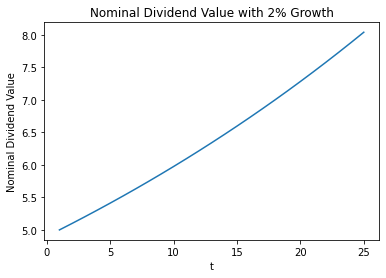

In [2]:
import matplotlib.pyplot as plt

#Track the first 25 years
t = list(range(1, 26))

#After the first year, the dividend grows by 2% each year
dividends1 = [5*(1.02)**(x-1) for x in t]

plt.plot(t,dividends1)
plt.xlabel("t")
plt.ylabel("Nominal Dividend Value")
plt.title("Nominal Dividend Value with 2% Growth")
plt.show()

Now what about the present value for each dividend?

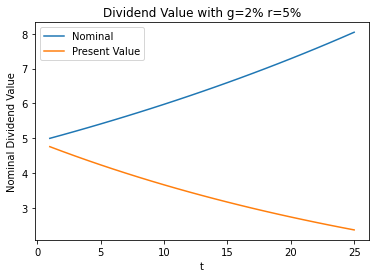

In [3]:
#Calculate the present value
dividends2 = [d/(1.05**x) for x, d in zip(t, dividends1)]

#Plot the two together
plt.plot(t,dividends1,label="Nominal")
plt.plot(t,dividends2,label="Present Value")
plt.legend()
plt.xlabel("t")
plt.ylabel("Nominal Dividend Value")
plt.title("Dividend Value with g=2% r=5%")
plt.show()

Since the present value of the dividend will eventually reach the point where it is worthless, the perpetuity formula can still work. It is important to understand that in any case where g > r, the formual no longer works because it would essentially be trying to represent the case where a company keeps having dividends that are worth more and more every single year even in terms of present value. The stock price would be infinity if that were true.

## Dividend Discount Model with Growth

When we introduce growth, the formula is changed to be the following:

$$ S = \frac{D_1}{r-g} $$

$ S = \text{Share Price} $

$ D_1 = \text{Dividend at year 1} $

$ r = \text{The discount rate} $

$ r = \text{The yearly dividend growth rate} $

What is the value going to be in the same scenario as before except now we have a growth rate of 2%.

In [4]:
#Growth drives value up since stocks are worth more in the future
print(5/(.05-.02))

166.66666666666666


To understand more how the growth rates changes the future value of dividend payments, let's simulate growth rates of 0%, 2%, 4%, 6%, 8%, and 10% applied to a starting dividend of $5 which we can assume is paid at time 0 now when there is a discount rate of 10%.

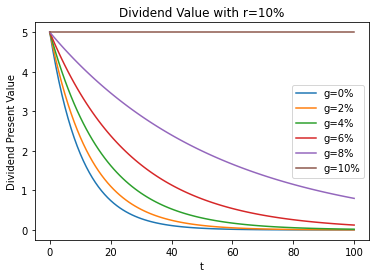

In [5]:
#Growth rates
growth_rates = [.02*x for x in range(0,6)]

#Years
t = list(range(101))

#Other parameters
r = .1
D0 = 5

#Find the present value of payments for different streams of dividends
dividend_PV = []
for g in growth_rates:
    dividend_PV.append([(D0*(1+g)**x)/((1+r)**x) for x in t])

#Plot the results
for d, g in zip(dividend_PV, growth_rates):
    plt.plot(t,d,label="g="+str(int(g*100))+"%")
plt.legend()
plt.xlabel("t")
plt.ylabel("Dividend Present Value")
plt.title("Dividend Value with r=10%")
plt.show()

Now we fully see that any time that $g > r$ there is no way for us to use this formula. As a final graphing exercise, let's test the value of the company as the growth rate approaches $g = r$. In this case we will go back to assuming there is a $5 dividend paid starting after a year.

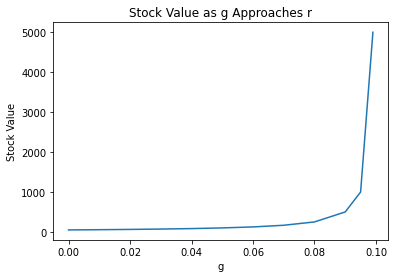

In [6]:
#Define the growth rates
growth_rates = [x/100 for x in range(10)] + [.095, .099]

#Find the values
vals = [5/(.1-g) for g in growth_rates]

#Plot results
plt.plot(growth_rates, vals)
plt.xlabel("g")
plt.ylabel("Stock Value")
plt.title("Stock Value as g Approaches r")
plt.show()

## Dividend Yield

As a final note, the dividend yield is defined as:

$$ y = \frac{D}{S} $$

where

$ y = \text{Dividend Yield}$

$ D = \text{Dividend}$

$ S = \text{Stock Value}$

For a stock with a $5 dividend, if the value of the company is 50 or the value is 100, we can easily find the dividend yield.

In [7]:
#Find the dividend yields
print(5/50)
print(5/100)

0.1
0.05
